In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
COLAB = True
print("Note: using Google CoLab")
%tensorflow_version 2.x

Mounted at /content/drive
Note: using Google CoLab


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import cv2
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
image_data = "/content/drive/My Drive/DMW/pickled_data.txt"
data = "/content/drive/My Drive/DMW/Preprocessing/hypertension/"

In [4]:
normal_left_y = pd.read_csv(data + 'hyper_left.csv').iloc[:,3]
normal_left_n = pd.read_csv(data + 'not_hyper_left.csv').iloc[:,3]

normal_right_y = pd.read_csv(data + 'hyper_right.csv').iloc[:,3]
normal_right_n = pd.read_csv(data + 'not_hyper_right.csv').iloc[:,3]

In [5]:
x_l = []
y_l = []
x_r = []
y_r = []
size_l = 50
size_b = 50

myfile = open(image_data, mode='rb')
temp = pickle.load(myfile)
myfile.close()

# count = 0
for image_name in normal_left_y:
  try:
    # count += 1
    image = temp[image_name]
    image = cv2.resize(image, (size_l, size_b))
    x_l.append(image)
    y_l.append(1)
    # if count % 100 == 0:
    #   print(count, 'done')
  except:
    print(image_name)
    break

for image_name in normal_left_n:
  try:
    # count += 1
    image = temp[image_name]
    image = cv2.resize(image, (size_l, size_b))
    x_l.append(image)
    y_l.append(0)
    # if count % 100 == 0:
    #   print(count, 'done')
  except:
    print(image_name)
    break


for image_name in normal_right_y:
  try:
    # count += 1
    image = temp[image_name]
    image = cv2.resize(image, (size_l, size_b))
    x_r.append(image)
    y_r.append(1)
    # if count % 100 == 0:
    #   print(count, 'done')
  except:
    print(image_name)
    break

for image_name in normal_right_n:
  try:
    # count += 1
    image = temp[image_name]
    image = cv2.resize(image, (size_l, size_b))
    x_r.append(image)
    y_r.append(0)
    # if count % 100 == 0:
    #   print(count, 'done')
  except:
    print(image_name)
    break

temp.clear()
print('data loaded')

data loaded


In [6]:
x_l_np = np.asarray(x_l)
y_l_np = np.asarray(y_l)
x_r_np = np.asarray(x_r)
y_r_np = np.asarray(y_r)

x_l_np.shape, y_l_np.shape, x_r_np.shape, y_r_np.shape

((3493, 50, 50, 3), (3493,), (3494, 50, 50, 3), (3494,))

In [ ]:
X_l_train, X_l_test, y_l_train, y_l_test = train_test_split(x_l_np, y_l_np, test_size=0.1, random_state=42)
X_r_train, X_r_test, y_r_train, y_r_test = train_test_split(x_r_np, y_r_np, test_size=0.1, random_state=42)

In [ ]:
model_l = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(size_l, size_b, 3)),
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(34, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64),
    layers.Dense(1, activation='sigmoid')
])

model_l.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_l.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 50, 50, 3)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 48, 48, 16)        448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 22, 22, 34)        4930      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 11, 11, 34)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4114)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

In [ ]:
epochs_l = 50
batch_size_l = 20
history_l = model_l.fit(x_l_np, y_l_np, batch_size=batch_size_l, epochs=epochs_l, validation_data=(X_l_test,y_l_test))

Epoch 1/50
175/175 [==============================] - 1s 3ms/step - loss: 0.1493 - accuracy: 0.9676 - val_loss: 0.1601 - val_accuracy: 0.9629
Epoch 2/50
175/175 [==============================] - 1s 3ms/step - loss: 0.1279 - accuracy: 0.9725 - val_loss: 0.1418 - val_accuracy: 0.9629
Epoch 3/50
175/175 [==============================] - 1s 3ms/step - loss: 0.1238 - accuracy: 0.9711 - val_loss: 0.1348 - val_accuracy: 0.9629
Epoch 4/50
175/175 [==============================] - 1s 3ms/step - loss: 0.1203 - accuracy: 0.9717 - val_loss: 0.1383 - val_accuracy: 0.9629
Epoch 5/50
175/175 [==============================] - 0s 3ms/step - loss: 0.1201 - accuracy: 0.9725 - val_loss: 0.1340 - val_accuracy: 0.9629
Epoch 6/50
175/175 [==============================] - 1s 3ms/step - loss: 0.1177 - accuracy: 0.9728 - val_loss: 0.1490 - val_accuracy: 0.9629
Epoch 7/50
175/175 [==============================] - 1s 3ms/step - loss: 0.1202 - accuracy: 0.9725 - val_loss: 0.1586 - val_accuracy: 0.9629
Epoch 

In [ ]:
model_r = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(size_l, size_b, 3)),
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(34, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64),
    layers.Dense(1, activation='sigmoid')
])

model_r.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_r.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 50, 50, 3)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 48, 48, 16)        448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 22, 22, 34)        4930      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 11, 11, 34)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4114)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

In [ ]:
epochs_r = 50
batch_size_r = 20
history_r = model_r.fit(x_r_np, y_r_np, batch_size=batch_size_r, epochs=epochs_r, validation_data=(X_r_test,y_r_test))

Epoch 1/50
175/175 [==============================] - 1s 3ms/step - loss: 0.1455 - accuracy: 0.9665 - val_loss: 0.1578 - val_accuracy: 0.9629
Epoch 2/50
175/175 [==============================] - 0s 3ms/step - loss: 0.1234 - accuracy: 0.9725 - val_loss: 0.1458 - val_accuracy: 0.9629
Epoch 3/50
175/175 [==============================] - 1s 3ms/step - loss: 0.1235 - accuracy: 0.9720 - val_loss: 0.1766 - val_accuracy: 0.9629
Epoch 4/50
175/175 [==============================] - 0s 3ms/step - loss: 0.1228 - accuracy: 0.9717 - val_loss: 0.1457 - val_accuracy: 0.9629
Epoch 5/50
175/175 [==============================] - 0s 3ms/step - loss: 0.1194 - accuracy: 0.9717 - val_loss: 0.1415 - val_accuracy: 0.9686
Epoch 6/50
175/175 [==============================] - 0s 3ms/step - loss: 0.1173 - accuracy: 0.9722 - val_loss: 0.1743 - val_accuracy: 0.9629
Epoch 7/50
175/175 [==============================] - 1s 3ms/step - loss: 0.1178 - accuracy: 0.9728 - val_loss: 0.1391 - val_accuracy: 0.9686
Epoch 

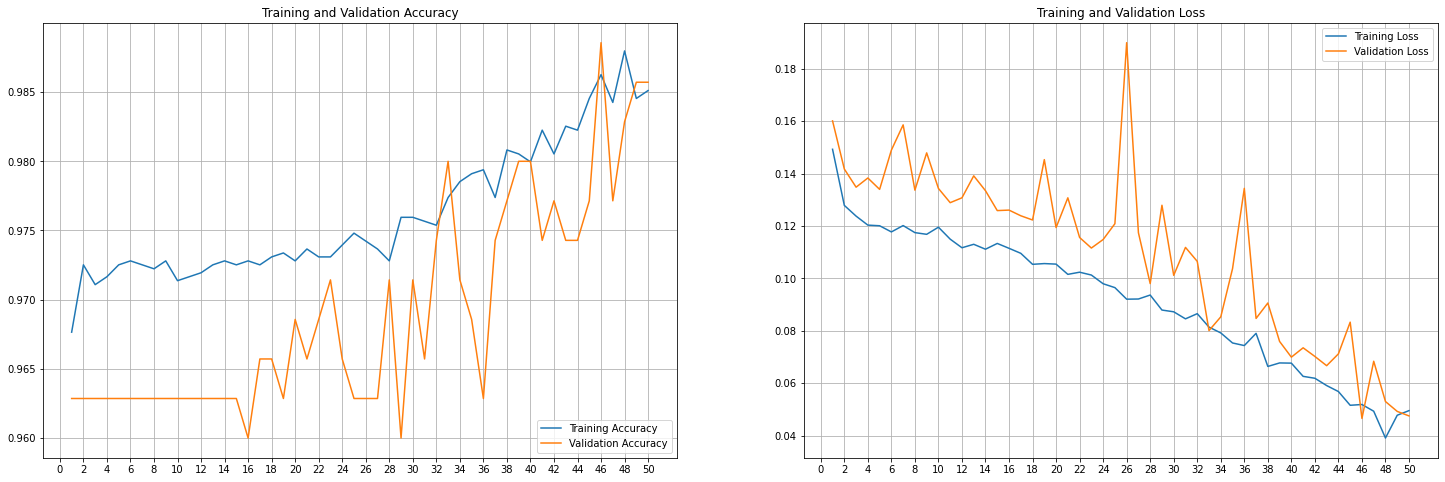

In [ ]:
acc = history_l.history['accuracy']
val_acc = history_l.history['val_accuracy']

loss = history_l.history['loss']
val_loss = history_l.history['val_loss']

epochs_range = range(1, epochs_l+1)

plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
plt.xticks(range(0, epochs_l+1, 2))
plt.grid()
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.xticks(range(0, epochs_l+1, 2))
plt.grid()
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

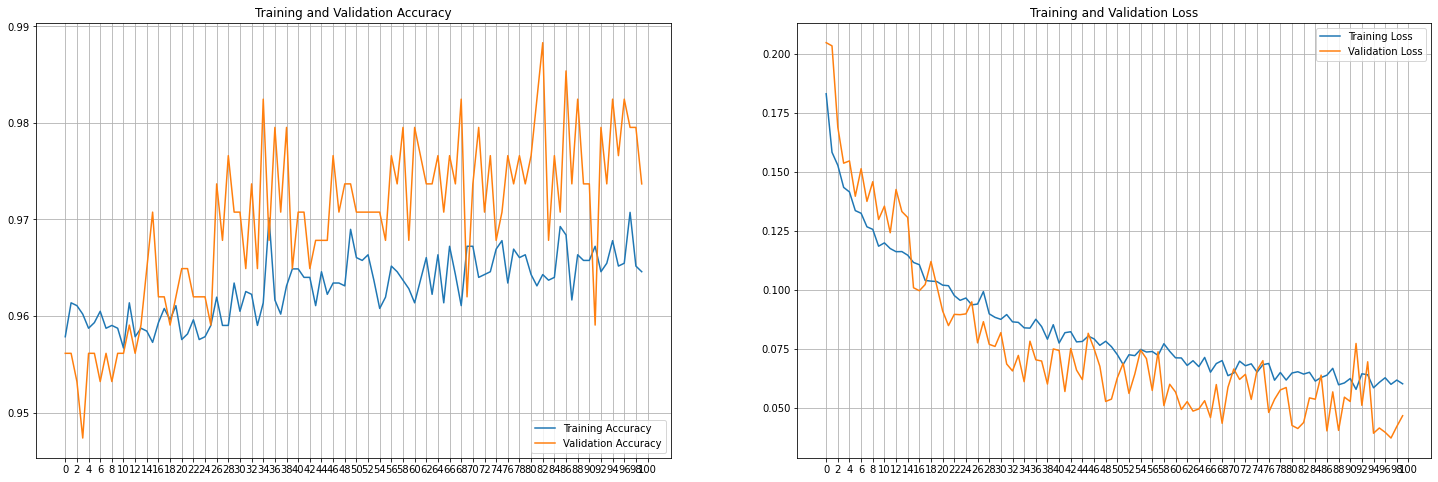

In [ ]:
acc = history_r.history['accuracy']
val_acc = history_r.history['val_accuracy']

loss = history_r.history['loss']
val_loss = history_r.history['val_loss']

epochs_range = range(epochs_r)

plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
plt.xticks(range(0, epochs_r+1, 2))
plt.grid()
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.xticks(range(0, epochs_r+1, 2))
plt.grid()
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
score = model_l.evaluate(X_l_test, y_l_test)
print("%s: %.2f%%" % (model_l.metrics_names[1], score[1]*100))

score = model_r.evaluate(X_r_test, y_r_test)
print("%s: %.2f%%" % (model_r.metrics_names[1], score[1]*100))

11/11 [==============================] - 0s 3ms/step - loss: 0.0475 - accuracy: 0.9857
accuracy: 98.57%
11/11 [==============================] - 0s 2ms/step - loss: 0.0702 - accuracy: 0.9743
accuracy: 97.43%


In [ ]:
from tensorflow.keras.models import model_from_json

model_json = model_l.to_json()
with open("/content/drive/My Drive/DMW/Preprocessing/hypertension/Model/Left_hypertension.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model_l.save_weights("/content/drive/My Drive/DMW/Preprocessing/hypertension/Model/Left_hypertension.h5")
print("Saved model to disk")

model_json = model_r.to_json()
with open("/content/drive/My Drive/DMW/Preprocessing/hypertension/Model/Right_hypertension.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model_r.save_weights("/content/drive/My Drive/DMW/Preprocessing/hypertension/Model/Right_hypertension.h5")
print("Saved model to disk")

Saved model to disk
Saved model to disk


In [7]:
from tensorflow.keras.models import model_from_json
# load json and create model
json_file = open('/content/drive/My Drive/DMW/Preprocessing/hypertension/Model/Left_hypertension.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model_l = model_from_json(loaded_model_json)
# load weights into new model
loaded_model_l.load_weights("/content/drive/My Drive/DMW/Preprocessing/hypertension/Model/Left_hypertension.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model_l.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])


# load json and create model
json_file = open('/content/drive/My Drive/DMW/Preprocessing/hypertension/Model/Right_hypertension.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model_r = model_from_json(loaded_model_json)
# load weights into new model
loaded_model_r.load_weights("/content/drive/My Drive/DMW/Preprocessing/hypertension/Model/Right_hypertension.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model_r.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

Loaded model from disk
Loaded model from disk


In [ ]:
score = loaded_model_l.evaluate(X_l_test, y_l_test)
print("%s: %.2f%%" % (loaded_model_l.metrics_names[1], score[1]*100))

score = loaded_model_r.evaluate(X_r_test, y_r_test)
print("%s: %.2f%%" % (loaded_model_r.metrics_names[1], score[1]*100))

11/11 [==============================] - 0s 2ms/step - loss: 0.0475 - accuracy: 0.9857
accuracy: 98.57%
11/11 [==============================] - 0s 2ms/step - loss: 0.0702 - accuracy: 0.9743
accuracy: 97.43%


In [8]:
from sklearn.metrics import confusion_matrix
y_pred_l = loaded_model_l.predict(x_l_np)
y_pred_l = np.asarray([y > 0.5 for y in y_pred_l])
y_pred_r = loaded_model_l.predict(x_r_np)
y_pred_r = np.asarray([y > 0.5 for y in y_pred_r])

cm_l = confusion_matrix(y_l_np, y_pred_l)
cm_r = confusion_matrix(y_r_np, y_pred_r)
print(cm_l)
print(cm_r)

[[3394    3]
 [  39   57]]
[[3383   14]
 [  86   11]]
